In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
def simulation_simple_model_homoskedasticity_high_r_squared(times):

    mses_regression = []

    mses_knns = {}
    ks = [2, 3, 5, 10, 20, 30]
    for k in ks:
        mses_knns[k] = []

    for run in range(times):
        # true DGP is: y = b0 + b1 * X + e, X ~ t(5), e ~ N(0, 1)
        # sample size: 1000
        sample_size = 1000

        b0 = 3
        b1 = 7
        # X = np.reshape(stats.norm.rvs(loc=10, scale=5, size=sample_size), (sample_size, 1))
        X = np.reshape(stats.t.rvs(5, size=sample_size), (sample_size, 1))
        e = np.reshape(stats.norm.rvs(loc=0, scale=1, size=sample_size), (sample_size, 1))
        Y = b0 + b1 * X + e

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

        # Linear regression model
        linear_reg_model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
        mses_regression.append(np.mean(np.square(linear_reg_model.predict(sm.add_constant(X_test)) - np.reshape(Y_test, (1, int(sample_size * 0.1))))))

        # KNN with K = k
        for k in ks:
            neighbours_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, Y_train)
            mses_knns[k].append(np.mean(np.square(neighbours_model.predict(X_test) - Y_test)))


    return np.mean(mses_regression), { key: np.mean(mses) for key, mses in mses_knns.items() }

In [12]:
def simulation_simple_model_homoskedasticity_low_r_squared(times):

    mses_regression = []

    mses_knns = {}
    ks = [2, 3, 5, 10, 20, 30]
    for k in ks:
        mses_knns[k] = []

    for run in range(times):
        # true DGP is: y = b0 + b1 * X + e, X ~ t(5), e ~ N(0, 10)
        # sample size: 1000
        sample_size = 1000

        b0 = 3
        b1 = 7
        X = np.reshape(stats.t.rvs(5, size=sample_size), (sample_size, 1))
        e = np.reshape(stats.norm.rvs(loc=0, scale=10, size=sample_size), (sample_size, 1))
        Y = b0 + b1 * X + e

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

        # Linear regression model
        linear_reg_model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
        mses_regression.append(np.mean(np.square(linear_reg_model.predict(sm.add_constant(X_test)) - np.reshape(Y_test, (1, int(sample_size * 0.1))))))

        # KNN with K = k
        for k in ks:
            neighbours_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, Y_train)
            mses_knns[k].append(np.mean(np.square(neighbours_model.predict(X_test) - Y_test)))


    return np.mean(mses_regression), { key: np.mean(mses) for key, mses in mses_knns.items() }

In [13]:
def simulation_simple_model_heteroskedasticity_high_r_squared(times):

    mses_regression = []
    mses_knns = {}
    ks = [2, 3, 5, 10, 20, 30]
    for k in ks:
        mses_knns[k] = []

    for run in range(times):
        # true DGP is: y = b0 + b1 * X + e, X ~ t(5) with std = 5, e ~ N(0, |X * 3|)
        # sample size: 1000
        sample_size = 1000

        b0 = 3
        b1 = 7
        X = np.reshape(stats.t.rvs(5, size=sample_size) * 5 / np.sqrt(5 / 3), (sample_size, 1))

        e = np.zeros(sample_size)
        for i in range(sample_size):
            e[i] = stats.norm.rvs(loc=0, scale=abs(X[i] * 3), size=1)[0]
        e = np.reshape(e, (sample_size, 1))

        Y = b0 + b1 * X + e

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

        # Linear regression model
        linear_reg_model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
        mses_regression.append(np.mean(np.square(linear_reg_model.predict(sm.add_constant(X_test)) - np.reshape(Y_test, (1, int(sample_size * 0.1))))))

        # KNN with K = k
        for k in ks:
            neighbours_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, Y_train)
            mses_knns[k].append(np.mean(np.square(neighbours_model.predict(X_test) - Y_test)))


    return np.mean(mses_regression), { key: np.mean(mses) for key, mses in mses_knns.items() }

In [14]:
def simulation_simple_model_heteroskedasticity_low_r_squared(times):

    mses_regression = []
    mses_knns = {}
    ks = [2, 3, 5, 10, 20, 30]
    for k in ks:
        mses_knns[k] = []

    for run in range(times):
        # true DGP is: y = b0 + b1 * X + e, X ~ t(5) with std = 5, e ~ N(0, 10 * |X * 3|)
        sample_size = 1000

        b0 = 3
        b1 = 7
        X = np.reshape(stats.t.rvs(5, size=sample_size) * 5 / np.sqrt(5 / 3), (sample_size, 1))

        e = np.zeros(sample_size)
        for i in range(sample_size):
            e[i] = stats.norm.rvs(loc=0, scale=10 * abs(X[i] * 3), size=1)[0]
        e = np.reshape(e, (sample_size, 1))

        Y = b0 + b1 * X + e

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

        # Linear regression model
        linear_reg_model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
        mses_regression.append(np.mean(np.square(linear_reg_model.predict(sm.add_constant(X_test)) - np.reshape(Y_test, (1, int(sample_size * 0.1))))))

        # KNN with K = k
        for k in ks:
            neighbours_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, Y_train)
            mses_knns[k].append(np.mean(np.square(neighbours_model.predict(X_test) - Y_test)))


    return np.mean(mses_regression), { key: np.mean(mses) for key, mses in mses_knns.items() }

In [15]:
def simulation_multiple_model_homoskedasticity_high_r_squared(times):

    mses_regression = []

    mses_knns = {}
    ks = [2, 3, 5, 10, 20, 30]
    for k in ks:
        mses_knns[k] = []

    for run in range(times):
        # true DGP is: y = b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4 + e
        # X1 ~ t(5), X2 ~ N(3, 4), X3 ~ N(0, 10), X4 ~ t(3) with std = 5, e ~ N(0, 4)
        # sample size: 1000
        sample_size = 1000

        b0 = 3
        b1 = 7
        b2 = -4
        b3 = 5
        b4 = -1

        X1 = stats.t.rvs(5, size=sample_size)
        X2 = stats.norm.rvs(loc=0, scale=3, size=sample_size)
        X3 = stats.norm.rvs(loc=0, scale=6, size=sample_size)
        X4 = stats.t.rvs(3, size=sample_size) * 5 / np.sqrt(3 / 1)
        X = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4})

        e = stats.norm.rvs(loc=0, scale=1, size=sample_size)
        Y = b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4 + e

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

        # Linear regression model
        linear_reg_model = linear_model.LinearRegression().fit(X_train, Y_train.reshape(int(sample_size * 0.9), 1))
        mses_regression.append(np.mean(np.square(linear_reg_model.predict(X_test) - np.reshape(Y_test, (int(sample_size * 0.1), 1)))))

        # KNN with K = k
        for k in ks:
            neighbours_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, Y_train)
            mses_knns[k].append(np.mean(np.square(neighbours_model.predict(X_test) - Y_test)))


    return np.mean(mses_regression), { key: np.mean(mses) for key, mses in mses_knns.items() }

In [16]:
def simulation_multiple_model_heteroskedasticity_low_r_squared(times):

    mses_regression = []

    mses_knns = {}
    ks = [2, 3, 5, 10, 20, 30]
    for k in ks:
        mses_knns[k] = []

    for run in range(times):
        # true DGP is: y = b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4 + e
        # X1 ~ t(5), X2 ~ N(3, 4), X3 ~ N(0, 3), X4 ~ t(3) with std = 5, e ~ N(0, 15 * |X3|)
        # sample size: 1000
        sample_size = 1000

        b0 = 3
        b1 = 7
        b2 = -4
        b3 = 5
        b4 = -1

        X1 = stats.t.rvs(5, size=sample_size)
        X2 = stats.norm.rvs(loc=0, scale=3, size=sample_size)
        X3 = stats.norm.rvs(loc=0, scale=6, size=sample_size)
        X4 = stats.t.rvs(3, size=sample_size) * 5 / np.sqrt(3 / 1)
        X = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4})

        e = np.zeros(sample_size)
        for i in range(sample_size):
            e[i] = stats.norm.rvs(loc=0, scale=15 * abs(X3[i]), size=1)[0]

        Y = b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4 + e

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

        # Linear regression model
        linear_reg_model = linear_model.LinearRegression().fit(X_train, Y_train.reshape(int(sample_size * 0.9), 1))
        mses_regression.append(np.mean(np.square(linear_reg_model.predict(X_test) - np.reshape(Y_test, (int(sample_size * 0.1), 1)))))

        # KNN with K = k
        for k in ks:
            neighbours_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, Y_train)
            mses_knns[k].append(np.mean(np.square(neighbours_model.predict(X_test) - Y_test)))


    return np.mean(mses_regression), { key: np.mean(mses) for key, mses in mses_knns.items() }

In [17]:
def summarize(title, linear_mse, knns_mses):
    print(title)
    print(linear_mse)
    print(knns_mses)

    fig, ax = plt.subplots()

    ax.axhline(y=linear_mse, color='r', linestyle='--')

    x, y = zip(*knns_mses.items())
    ax.plot(x, y, color='b')

    ax.set_xlabel('parameter K in KNN')
    ax.set_ylabel('MSE')
    ax.legend(['Linear model MSE', 'KNN MSE'])

    ax.set_title(title)

    plt.show()

Simple model homoskedastic high r2
1.0063192882001621
{2: 2.1456658116696663, 3: 2.1305882142321244, 5: 2.2418726615172884, 10: 2.6711990004133974, 20: 3.504992227069257, 30: 4.270612756436968}


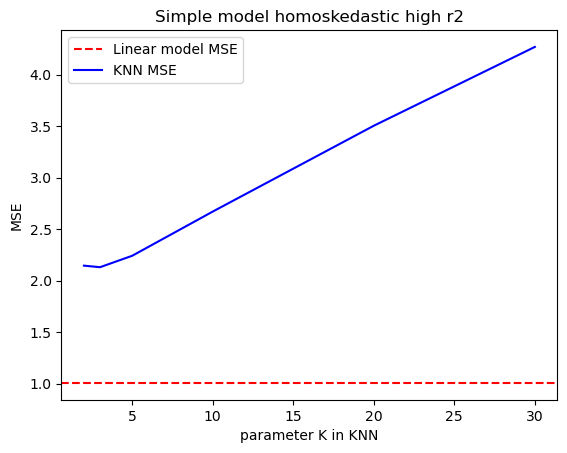

Simple model homoskedastic low r2
100.99646121152807
{2: 152.38367839876324, 3: 135.30076554621203, 5: 121.99260462766085, 10: 112.57543557570065, 20: 108.66616508525125, 30: 107.9110205799745}


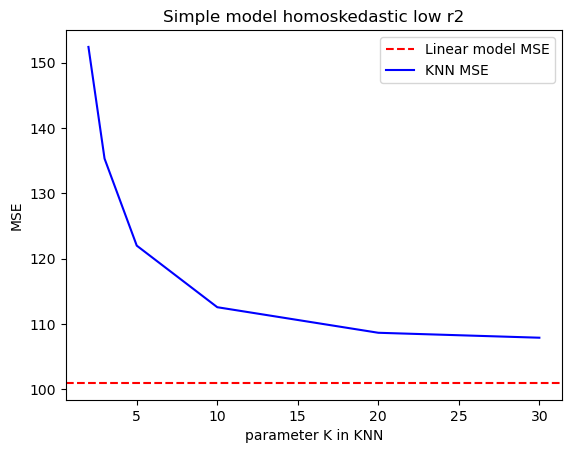

Simple model heteroskedastic high r2
228.18509643346118
{2: 340.9140909087728, 3: 307.47863692627664, 5: 283.7678559903025, 10: 270.99722932827297, 20: 275.1580631828484, 30: 284.0182933452481}


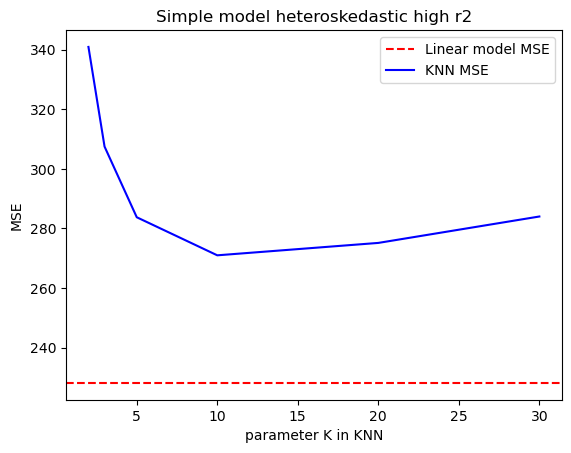

Simple model heteroskedastic low r2
22963.578142743216
{2: 33696.61729993478, 3: 30075.558995467833, 5: 27178.42637958253, 10: 24923.045368795076, 20: 23893.212010052383, 30: 23524.703981256564}


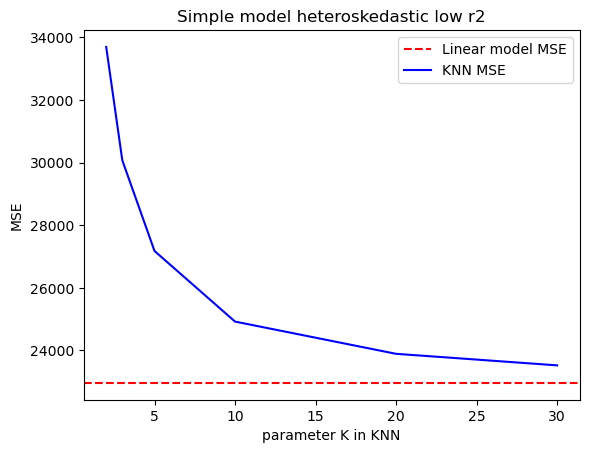

Multiple model homoskedastic high r2
1.0061879429992349
{2: 59.35757491227071, 3: 56.16445011292599, 5: 56.736073376143494, 10: 64.59750161213202, 20: 79.80415665090855, 30: 92.78927111748757}


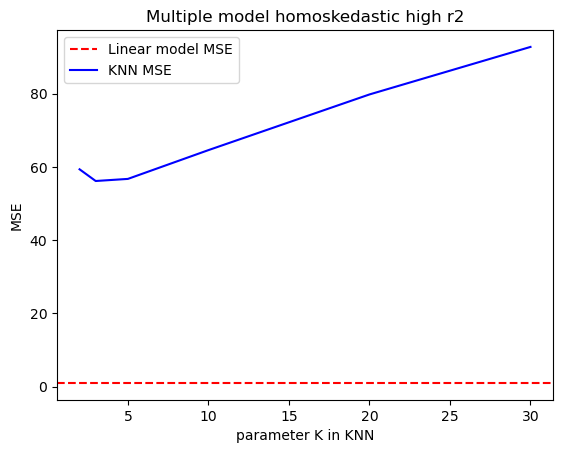

In [ ]:
lms, kms = simulation_simple_model_homoskedasticity_high_r_squared(1000)
summarize('Simple model homoskedastic high r2', lms, kms)

lms, kms = simulation_simple_model_homoskedasticity_low_r_squared(1000)
summarize('Simple model homoskedastic low r2', lms, kms)

lms, kms = simulation_simple_model_heteroskedasticity_high_r_squared(1000)
summarize('Simple model heteroskedastic high r2', lms, kms)

lms, kms = simulation_simple_model_heteroskedasticity_low_r_squared(1000)
summarize('Simple model heteroskedastic low r2', lms, kms)

lms, kms = simulation_multiple_model_homoskedasticity_high_r_squared(1000)
summarize('Multiple model homoskedastic high r2', lms, kms)

lms, kms = simulation_multiple_model_heteroskedasticity_low_r_squared(1000)
summarize('Multiple model heteroskedastic low r2', lms, kms)